**PROJECT: AICTE IBM "DATA ANALYTICS"**

#### <font color="#1F6357">1. IMPORT REQUIRED LIBRARIES</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### <font color="#1F6357">2. IMPORT DATA</font>


In [2]:
data = pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv', index_col = 'Row ID', encoding='cp1252')
data.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [3]:
data.shape

(9994, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [5]:
# checking For null values
data.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
# checking for duplicated rows
data.duplicated().sum()

1

In [7]:
# cleaning the duplicated row
data.loc[data.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
3407,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [8]:
# drop unnecessary columns
data = data.drop(columns=["Country", "Customer Name"])

# drop duplicated data
data = data.drop_duplicates()

In [9]:
# understanding the numerical features
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55191.576403,229.852846,3.789753,0.156188,28.660971
std,32065.074478,623.276074,2.225149,0.206457,234.271476
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.731000
50%,56560.000000,54.480000,3.000000,0.200000,8.671000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
# understanding the categorical features
cat_features = [f for f in data.columns if(data[f].dtype=='O')]
data[cat_features].describe()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993
unique,5009,1237,1334,4,793,3,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,Consumer,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5967,37,5191,915,2001,3203,19,6026,1523,48


In [11]:
for c in cat_features:
    print(c , ":" ,data[c].nunique())

Order ID : 5009
Order Date : 1237
Ship Date : 1334
Ship Mode : 4
Customer ID : 793
Segment : 3
City : 531
State : 49
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850


#### <font color="#1F6357">3. EXPLORATORY DATA ANALYSIS</font>

In [12]:
# Helper Function For Visualization
def Viz_Bar(df1, cx, cy, t='', rot="horizontal", x=True):
    if(x is False):
        plt.rcdefaults()
        fig, ax = plt.subplots()
        ax.barh(df1.head(10)[cx], df1.head(10)[cy], align='center', color=['#F05454','#30475E' ,'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] )
        ax.set_yticks(df1.head(10)[cx], labels=df1.head(10)[cx])
        ax.invert_yaxis()
        ax.set_xlabel(cy)
        ax.set_title(t)
        plt.xticks(rotation = rot)
        plt.show()
    else :
        plt.bar(df1.head(10)[cx] ,df1.head(10)[cy] ,  color=['#F05454','#30475E' ,'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] )
        plt.xlabel(cx)
        plt.ylabel(cy)
        plt.title(t)
        plt.xticks(rotation = rot)
        plt.show()

#### <font color="#1F6357">4. GEOGRAPHICAL ANALYSIS</font>

##### <font color="#1B8A6B">CITY-WISE ANALYSIS</font>

In [13]:
data['City'].nunique()

531

In [14]:
cities_info = data.groupby("City").sum().reset_index()
cities_info

/tmp/ipykernel_33/620085200.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cities_info = data.groupby("City").sum().reset_index()


,City,Postal Code,Sales,Quantity,Discount,Profit
0,Aberdeen,57401,25.500,3,0.0,6.6300
1,Abilene,79605,1.392,2,0.8,-3.7584
2,Akron,930552,2729.986,65,7.5,-186.6356
3,Albuquerque,1219470,2220.160,65,0.8,634.0881
4,Alexandria,356864,5519.570,84,0.0,318.6183
...,...,...,...,...,...,...
526,Woonsocket,11580,195.550,15,0.0,78.6791
527,Yonkers,160515,7657.666,57,1.0,2767.7557
528,York,87015,817.978,19,2.1,-102.1692
529,Yucaipa,92399,50.800,5,0.0,13.2080


##### <font color="#1B8A6B">HIGHEST SELLING CITIES</font>

In [15]:
cities_info[['City' ,'Sales']].sort_values(by = ["Sales"] ,ascending = False).head(10)

,City,Sales
329,New York City,256368.1610
266,Los Angeles,175851.3410
452,Seattle,119540.7420
438,San Francisco,112669.0920
374,Philadelphia,109077.0130
207,Houston,64504.7604
80,Chicago,48539.5410
437,San Diego,47521.0290
216,Jacksonville,44713.1830
464,Springfield,43054.3420


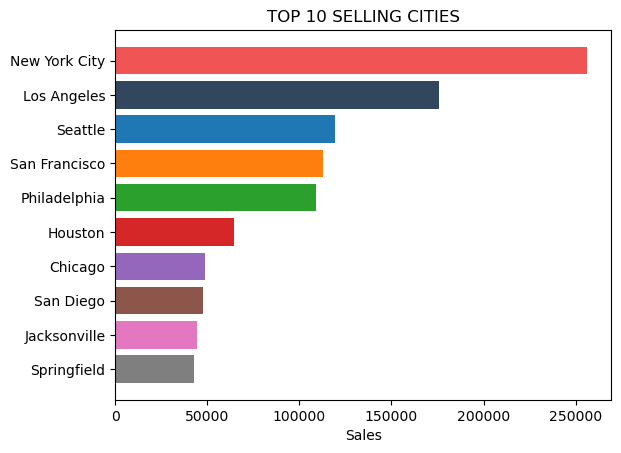

In [16]:
Viz_Bar(cities_info.sort_values(by=["Sales"], ascending=False), 'City', 'Sales', 'TOP 10 SELLING CITIES', 'horizontal', False)

##### <font color="#1B8A6B">LEAST SELLING CITIES</font>

In [17]:
cities_info[['City' ,'Sales']].sort_values(by = ["Sales"], ascending = True).head(10)

,City,Sales
1,Abilene,1.392
140,Elyria,1.824
221,Jupiter,2.064
370,Pensacola,2.214
354,Ormond Beach,2.808
441,San Luis Obispo,3.620
463,Springdale,4.300
249,Layton,4.960
222,Keller,6.000
305,Missouri City,6.370


##### <font color="#1B8A6B">HIGHEST PROFITABLE CITIES</font>

In [18]:
cities_info[['City', 'Profit']].sort_values(by = ["Profit"], ascending = False).head(10)

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


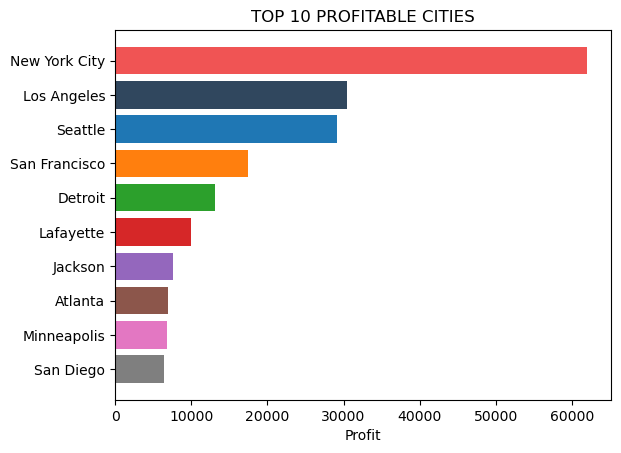

In [19]:
Viz_Bar(cities_info[['City', 'Profit']].sort_values(by = ["Profit"], ascending = False), 'City', 'Profit', 'TOP 10 PROFITABLE CITIES', 'horizontal', False)

##### <font color="#1B8A6B">NON-PROFITABLE CITIES</font>

In [20]:
cities_info[cities_info['Profit']<=0].sort_values(by = ['Profit'])

,City,Postal Code,Sales,Quantity,Discount,Profit
374,Philadelphia,10275302,109077.0130,1981,175.50,-13837.7674
207,Houston,29052387,64504.7604,1466,143.14,-10153.5485
434,San Antonio,4614213,21843.5280,247,22.60,-7299.0502
241,Lancaster,1980720,9891.4640,171,14.50,-7239.0684
80,Chicago,19037248,48539.5410,1132,120.50,-6654.5688
...,...,...,...,...,...,...
354,Ormond Beach,32174,2.8080,3,0.70,-1.9656
370,Pensacola,32503,2.2140,3,0.70,-1.4760
140,Elyria,44035,1.8240,1,0.70,-1.3984
7,Altoona,33204,20.4510,9,0.90,-1.1835


##### <font color="#1B8A6B">STATE-WISE ANALYSIS</font>

In [21]:
data['State'].nunique()

49

In [22]:
states_info = data.groupby('State').sum().reset_index()
states_info.head()

/tmp/ipykernel_33/1622045360.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  states_info = data.groupby('State').sum().reset_index()


,State,Postal Code,Sales,Quantity,Discount,Profit
0,Alabama,2195669,19510.6400,256,0.0,5786.8253
1,Arizona,19102126,35282.0010,862,68.0,-3427.9246
2,Arkansas,4339309,11678.1300,240,0.0,4008.6871
3,California,184382639,457687.6315,7667,145.6,76381.3871
4,Colorado,14613828,32108.1180,693,57.6,-6527.8579


##### <font color="#1B8A6B">SALES BY STATE</font>

In [23]:
states_info = states_info.sort_values(by = ['Sales'], ascending = False)
states_info.head(10)

,State,Postal Code,Sales,Quantity,Discount,Profit
3,California,184382639,457687.6315,7667,145.60,76381.3871
30,New York,11835721,310876.2710,4224,62.40,74038.5486
41,Texas,75747693,170188.0458,3724,364.64,-25729.3563
45,Washington,49661687,138641.2700,1883,32.40,33402.6517
36,Pennsylvania,11190565,116511.9140,2153,192.90,-15559.9603
8,Florida,12640225,89473.7080,1379,114.65,-3399.3017
11,Illinois,29873772,80166.1010,1845,191.90,-12607.8870
33,Ohio,20536607,77976.7640,1757,152.10,-16959.3178
20,Michigan,12356103,76269.6140,946,1.80,24463.1876
44,Virginia,5124335,70636.7200,893,0.00,18597.9504


<Axes: ylabel='State'>

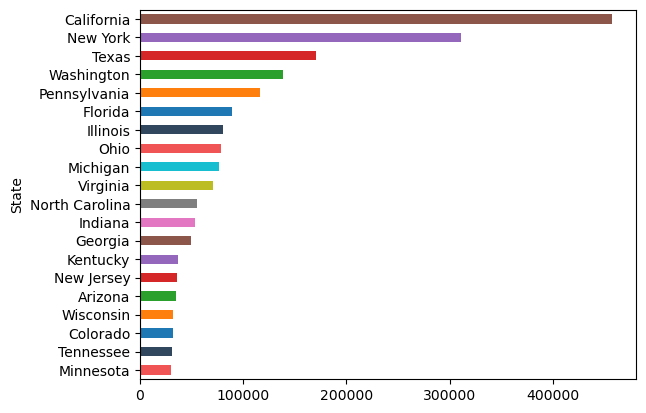

In [24]:
colors = color=['#F05454','#30475E' ,'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
data.groupby('State')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors)

##### <font color="#1B8A6B">PROFIT BY STATE</font>

In [25]:
states_info = states_info.sort_values(by = ['Profit'], ascending = False)
states_info.head()

,State,Postal Code,Sales,Quantity,Discount,Profit
3,California,184382639,457687.6315,7667,145.6,76381.3871
30,New York,11835721,310876.2710,4224,62.4,74038.5486
45,Washington,49661687,138641.2700,1883,32.4,33402.6517
20,Michigan,12356103,76269.6140,946,1.8,24463.1876
44,Virginia,5124335,70636.7200,893,0.0,18597.9504


<Axes: ylabel='State'>

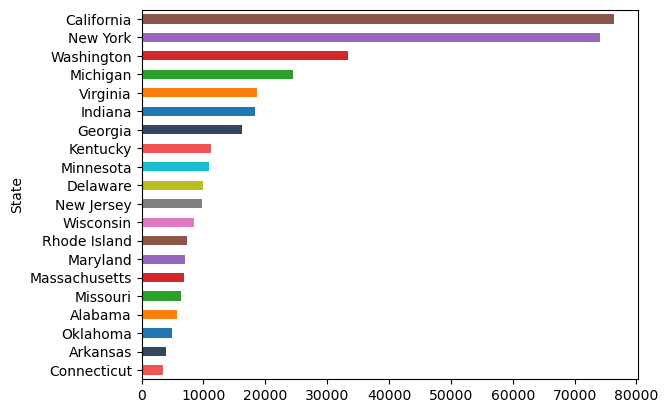

In [26]:
color=['#F05454','#30475E' ,'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
data.groupby('State')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors)

##### <font color="#1B8A6B">NON-PROFITABLE STATES</font>

In [27]:
states_info[states_info['Profit']<=0]

,State,Postal Code,Sales,Quantity,Discount,Profit
35,Oregon,12072125,17431.1500,499,35.80,-1190.4705
8,Florida,12640225,89473.7080,1379,114.65,-3399.3017
1,Arizona,19102126,35282.0010,862,68.00,-3427.9246
40,Tennessee,6890574,30661.8730,681,53.30,-5341.6936
4,Colorado,14613828,32108.1180,693,57.60,-6527.8579
31,North Carolina,6994384,55603.1640,983,70.60,-7490.9122
11,Illinois,29873772,80166.1010,1845,191.90,-12607.8870
36,Pennsylvania,11190565,116511.9140,2153,192.90,-15559.9603
33,Ohio,20536607,77976.7640,1757,152.10,-16959.3178
41,Texas,75747693,170188.0458,3724,364.64,-25729.3563


##### <font color="#1B8A6B">REGION-WISE ANALYSIS</font>

In [28]:
regions_info  = data.groupby('Region').sum().reset_index()
regions_info

/tmp/ipykernel_33/2716135155.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regions_info  = data.groupby('Region').sum().reset_index()


,Region,Postal Code,Sales,Quantity,Discount,Profit
0,Central,151786150,501239.8908,8780,558.34,39706.3625
1,East,50128469,678499.8680,10616,413.70,91534.8388
2,South,55875052,391721.9050,6209,238.55,46749.4303
3,West,293739752,725457.8245,12266,350.20,108418.4489


##### <font color="#1B8A6B">SALES BY REGION</font>

In [29]:
regions_info [['Region', 'Sales']]

,Region,Sales
0,Central,501239.8908
1,East,678499.8680
2,South,391721.9050
3,West,725457.8245


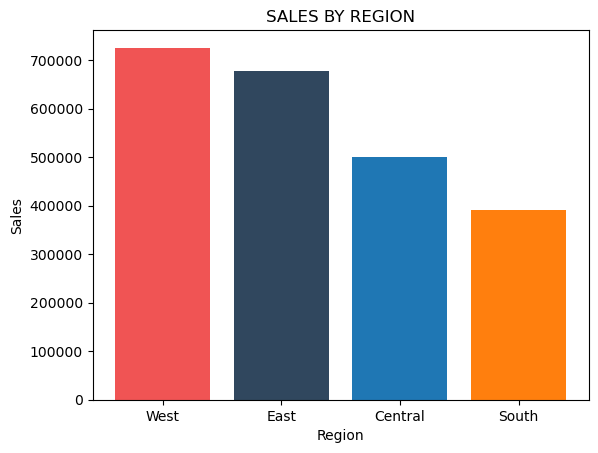

In [30]:
Viz_Bar(regions_info.sort_values(by = ['Sales'], ascending = False), 'Region', 'Sales', 'SALES BY REGION')

##### <font color="#1B8A6B">PROFIT BY REGION</font>

In [31]:
regions_info [['Region', 'Profit']]

,Region,Profit
0,Central,39706.3625
1,East,91534.8388
2,South,46749.4303
3,West,108418.4489


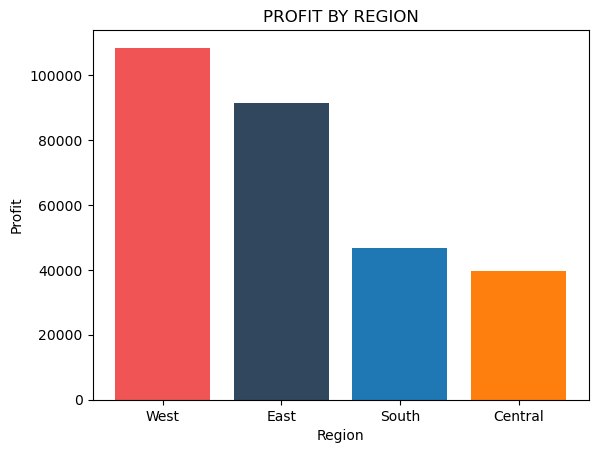

In [32]:
Viz_Bar(regions_info.sort_values(by=['Profit'], ascending = False), 'Region', 'Profit', 'PROFIT BY REGION')

#### <font color="#1F6357">5. PRODUCT ANALYSIS</font>

In [33]:
data['Product Name'].nunique()

1850

In [34]:
products_info = data.groupby(['Product Name']).sum().reset_index()
products_info

/tmp/ipykernel_33/489423724.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  products_info = data.groupby(['Product Name']).sum().reset_index()


,Product Name,Postal Code,Sales,Quantity,Discount,Profit
0,"""While you Were Out"" Message Book, One Form pe...",192854,25.228,8,0.4,10.3880
1,"#10 Gummed Flap White Envelopes, 100/Box",156773,41.300,11,0.4,16.7678
2,#10 Self-Seal White Envelopes,181933,108.682,10,0.2,52.1230
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",314765,488.904,32,0.4,223.1408
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",557280,286.672,37,0.8,115.2806
...,...,...,...,...,...,...
1845,iKross Bluetooth Portable Keyboard + Cell Phon...,276516,477.660,24,0.4,115.6440
1846,iOttie HLCRIO102 Car Mount,218554,215.892,12,0.8,-11.9940
1847,iOttie XL Car Mount,135526,223.888,14,0.4,-50.3748
1848,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,409422,442.554,29,1.2,171.2648


##### <font color="#1B8A6B">TOP SELLING PRODUCTS</font>

In [35]:
Sales_info = products_info[["Product Name", "Sales"]].sort_values(by=['Sales'], ascending = False)
Sales_info.head(10)

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
786,HON 5400 Series Task Chairs for Big and Tall,21870.576
686,GBC DocuBind TL300 Electric Binding System,19823.479
688,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
805,Hewlett Packard LaserJet 3310 Copier,18839.686
787,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
683,GBC DocuBind P400 Electric Binding System,17965.068
813,High Speed Automatic Electric Letter Opener,17030.312


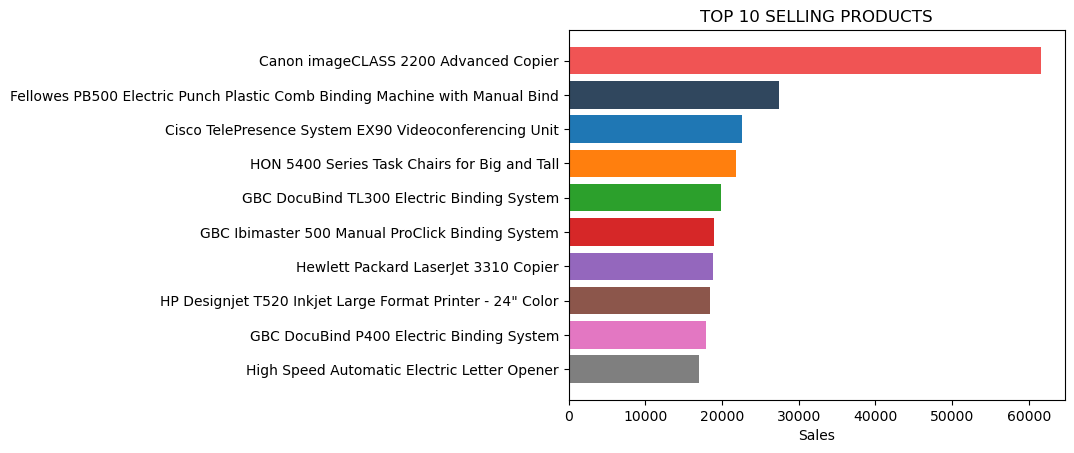

In [36]:
Viz_Bar(Sales_info, 'Product Name', 'Sales', 'TOP 10 SELLING PRODUCTS', 'horizontal', False)

##### <font color="#1B8A6B">LEAST SELLING PRODUCTS</font>

In [37]:
Sales_info.sort_values(by=['Sales']).head(10)

,Product Name,Sales
605,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624
208,Avery 5,5.760
1793,Xerox 20,6.480
784,Grip Seal Envelopes,7.072
253,Avery Hi-Liter Pen Style Six-Color Fluorescent...,7.700
249,Avery Hi-Liter Comfort Grip Fluorescent Highli...,7.800
1780,Xerox 1989,7.968
27,4009 Highlighters,8.040
1509,Stockwell Gold Paper Clips,8.096
1113,Newell 308,8.400


##### <font color="#1B8A6B">MOST PROFITABLE PRODUCTS</font>

In [38]:
Profit_info = products_info[["Product Name", "Profit"]].sort_values(by=['Profit'], ascending = False)
Profit_info.head(10)

,Product Name,Profit
404,Canon imageCLASS 2200 Advanced Copier,25199.9280
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
805,Hewlett Packard LaserJet 3310 Copier,6983.8836
400,Canon PC1060 Personal Laser Copier,4570.9347
787,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766
165,Ativa V4110MDD Micro-Cut Shredder,3772.9461
19,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
1276,Plantronics Savi W720 Multi-Device Wireless He...,3696.2820
895,Ibico EPK-21 Electric Binding System,3345.2823
1840,Zebra ZM400 Thermal Label Printer,3343.5360


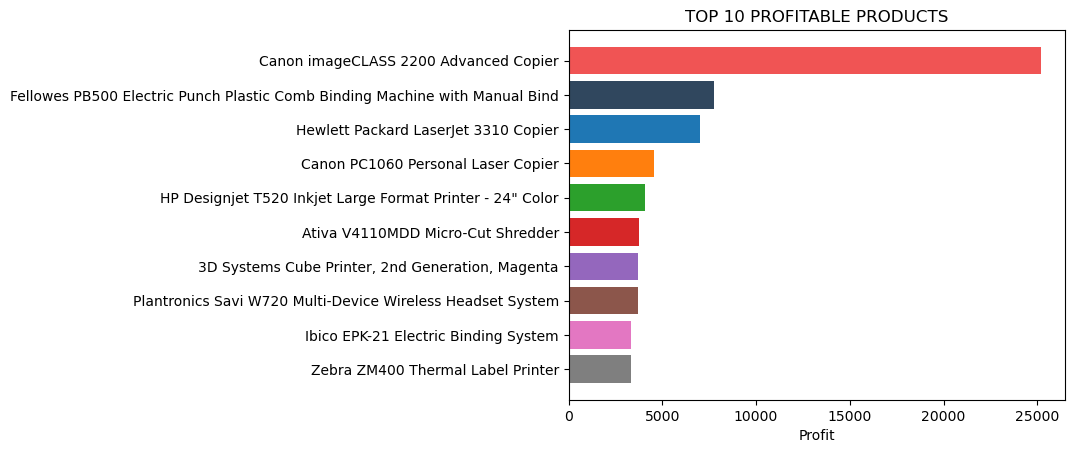

In [39]:
Viz_Bar(Profit_info, 'Product Name', 'Profit', 'TOP 10 PROFITABLE PRODUCTS', "horizontal", False)

##### <font color="#1B8A6B">NON-PROFITABLE PRODUCTS</font>

In [40]:
Profit_info[Profit_info['Profit']<=0]

,Product Name,Profit
269,"Avery Trapezoid Extra Heavy Duty 4"" Binders",0.000000e+00
131,"Alliance Big Bands Rubber Bands, 12/Pack",0.000000e+00
309,Belkin OmniView SE Rackmount Kit,0.000000e+00
767,Global Super Steno Chair,-1.776357e-15
1300,Premier Electric Letter Opener,-7.105427e-15
...,...,...
376,Bush Advantage Collection Racetrack Conference...,-1.934398e+03
425,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-2.876116e+03
476,Cubify CubeX 3D Printer Triple Head Print,-3.839990e+03
985,Lexmark MX611dhe Monochrome Laser Printer,-4.589973e+03


#### <font color="#1F6357">6. RELATIONSHIP BETWEEN PRODUCTS</font>

In [41]:
data['Order ID'].nunique()

5009

In [42]:
products_details = data.copy()
products_details['Product Bundle'] = [[] for i in data.index]

products_details['Product Bundle'] = products_details.groupby("Order ID")['Product Name'].transform(lambda x : ','.join(x) )
products_details= products_details[['Order ID' , 'Product Bundle']].drop_duplicates()

products_details.head(10)

,Order ID,Product Bundle
Row ID,,
1,CA-2016-152156,"Bush Somerset Collection Bookcase,Hon Deluxe F..."
3,CA-2016-138688,Self-Adhesive Address Labels for Typewriters b...
4,US-2015-108966,"Bretford CR4500 Series Slim Rectangular Table,..."
6,CA-2014-115812,Eldon Expressions Wood and Plastic Desk Access...
13,CA-2017-114412,Xerox 1967
14,CA-2016-161389,Fellowes PB200 Plastic Comb Binding Machine
15,US-2015-118983,Holmes Replacement Filter for HEPA Air Cleaner...
17,CA-2014-105893,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x..."
18,CA-2014-167164,Fellowes Super Stor/Drawer


In [43]:
from itertools import combinations
from collections import Counter

cnt = Counter()
common_products =pd.DataFrame()
for row in products_details['Product Bundle'] :
    row_list = row.split(',')
    cnt.update(Counter(combinations(row_list,2)))

cnt.most_common(10) # top 10 products bought together

[(('Acco Pressboard Covers with Storage Hooks', ' 14 7/8" x 11"'), 24),
 (('Acco Pressboard Covers with Storage Hooks', ' Executive Red'), 17),
 (('Adams Telephone Message Book W/Dividers/Space For Phone Numbers',
   ' 5 1/4"X8 1/2"'),
  17),
 ((' Chisel Tip', ' Yellow'), 15),
 (('Situations Contoured Folding Chairs', ' 4/Set'), 15),
 (('Global High-Back Leather Tilter', ' Burgundy'), 14),
 (("Global Wood Trimmed Manager's Task Chair", ' Khaki'), 14),
 (('Hot File 7-Pocket', ' Floor Stand'), 13),
 (('ACCOHIDE 3-Ring Binder', ' Blue'), 13),
 (('ACCOHIDE 3-Ring Binder', ' 1"'), 13)]

#### <font color="#1F6357">7. CATEGORY-WISE ANALYSIS</font>

In [44]:
category_info = data.groupby("Category").sum().reset_index()
category_info

/tmp/ipykernel_33/924648879.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_info = data.groupby("Category").sum().reset_index()


,Category,Postal Code,Sales,Quantity,Discount,Profit
0,Furniture,118152797,741718.4233,8026,368.59,18463.3316
1,Office Supplies,330772872,719047.0320,22906,947.80,122490.8008
2,Technology,102603754,836154.0330,6939,244.40,145454.9481


##### <font color="#1B8A6B">SALES BY CATEGORY</font>

In [45]:
category_info[["Category", "Sales"]]

,Category,Sales
0,Furniture,741718.4233
1,Office Supplies,719047.0320
2,Technology,836154.0330


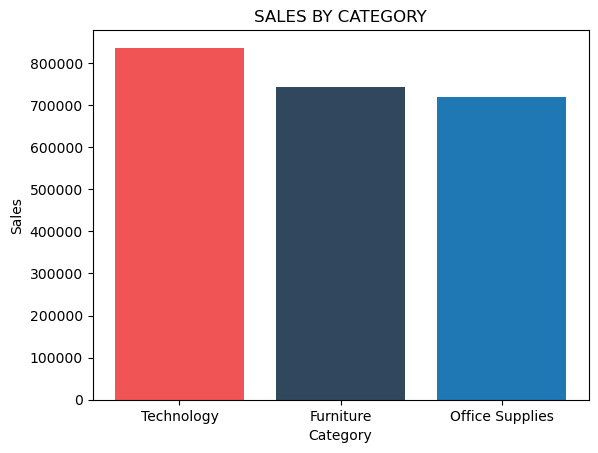

In [46]:
Viz_Bar(category_info.sort_values(by=['Sales'], ascending = False), 'Category', 'Sales', 'SALES BY CATEGORY')

##### <font color="#1B8A6B">SALES BY PROFIT</font>

In [47]:
category_info[["Category", "Profit"]]

,Category,Profit
0,Furniture,18463.3316
1,Office Supplies,122490.8008
2,Technology,145454.9481


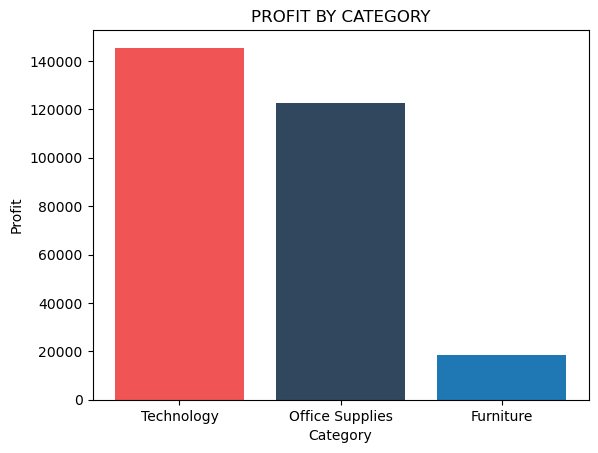

In [48]:
Viz_Bar(category_info.sort_values(by=['Profit'], ascending = False), 'Category', 'Profit', 'PROFIT BY CATEGORY')

#### <font color="#1F6357">8. CUSTOMER ANALYSIS</font>

##### <font color="#1B8A6B">TOP CUSTOMERS</font>

In [49]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sales_per_segment = data[['Segment', 'Sales']].groupby('Segment').sum()
sales_per_segment.sort_values(by='Sales', ascending=False, inplace=True)
sales_per_segment['cumperc'] = sales_per_segment.cumsum()/sales_per_segment.sum() * 100

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Bar(x = sales_per_segment.index,
           y = sales_per_segment['Sales'],
           name = "Sum",
           marker_color = colors[0]
           )
)

fig.add_trace(
    go.Scatter(x = sales_per_segment.index,
               y = sales_per_segment['cumperc'],
               name = "Cumulative %",
               line=dict(color='hotpink', width=2)),
    secondary_y=True,
)

fig.update_layout(
    xaxis_title="Segment",
    font = dict(
            size = 14
            ),
    title={
        'text': "CUSTOMER ANALYSIS BY TOTAL SALES",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
)

fig.update_yaxes(title_text="Sales", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Sum (%)", secondary_y=True)

fig.show()

##### <font color="#1B8A6B">RELATIONSHIP BETWEEN CUSTOMERS AND SHIP MODE</font>

In [50]:
data['Ship Mode'].value_counts()

Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [51]:
pivot_table = data.pivot_table(index = "Segment", columns = "Ship Mode", values = 'Sales', aggfunc = 'sum')
pivot_table

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,159168.9650,60596.359,231498.9496,710137.0714
Corporate,105858.4699,45121.323,146126.0388,409040.5351
Home Office,86400.9880,22645.443,81568.5810,238756.7645


Text(0, 0.5, 'Sales')

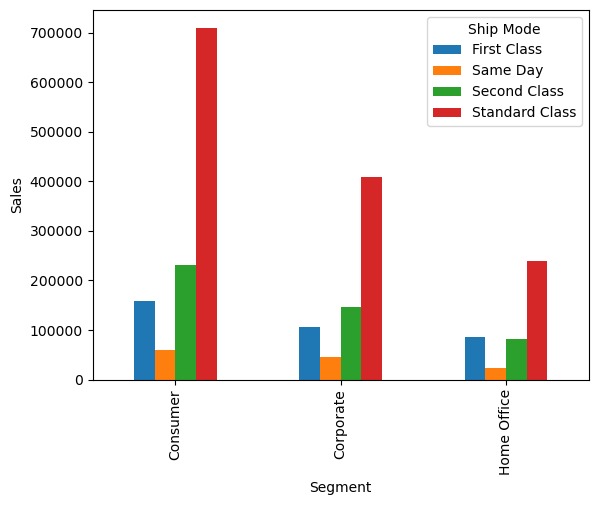

In [52]:
pivot_table.plot(kind = 'bar', stacked = False)
plt.ylabel("Sales")

In [53]:
pivot_table2 = data.pivot_table(index = "Segment", columns = "Ship Mode", values = 'Profit', aggfunc = 'sum')
pivot_table2

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,21374.0436,9874.2054,24946.9112,77924.0490
Corporate,14464.4724,1818.1418,18225.7131,57470.8067
Home Office,13131.3239,4199.4117,14274.0111,28705.9906


Text(0, 0.5, 'Profit')

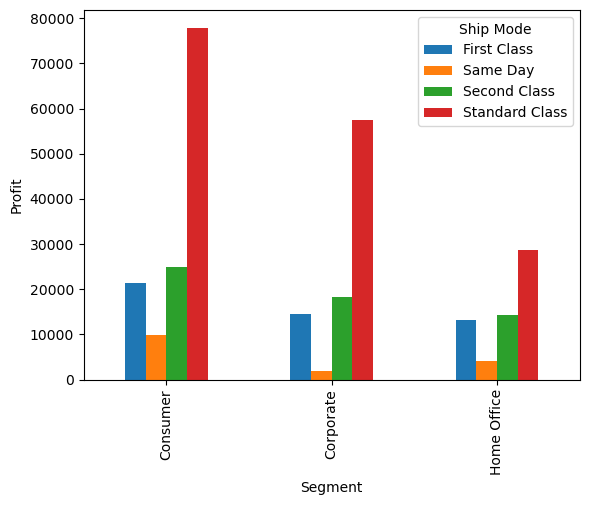

In [54]:
pivot_table2.plot(kind = 'bar', stacked = False)
plt.ylabel("Profit")

In [55]:
data_timeseries = data.copy()

data_timeseries['Profitable'] = data_timeseries['Profit'] / abs(data_timeseries['Profit'])
data_timeseries['Profitable'] = data_timeseries['Profitable'].fillna(0)
data_timeseries['Profitable'] = data_timeseries['Profitable'].astype(int)

fig = go.Figure(go.Scatter(
                 x = data_timeseries['Order Date'],
                 y = data_timeseries['Profit'],
                 mode='markers',
                 marker=dict(
                         size = data_timeseries['Sales']/500,
                         color= data_timeseries['Profitable'])
)
)
# layout
fig.update_layout(
    yaxis_title = "Profit",
    xaxis_title="Date",
    showlegend = False,
    font = dict(
            size = 14
            ),
    title={
        'text': "SALES & PROFIT OVER THE TIME PERIOD (2014-2018)",
        'y':0.95,
        'x':0.5
          },
    template = 'simple_white',
)

fig.show()

#### <font color="#1F6357">9. DISCOUNT IMPACT ON SALES & PROFIT</font>

In [56]:
discounts_info = data.groupby("Discount").sum()[['Sales', 'Profit']].reset_index()
discounts_info

/tmp/ipykernel_33/3047735479.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Discount,Sales,Profit
0,0.00,1.087908e+06,320987.6032
1,0.10,5.436935e+04,9029.1770
2,0.15,2.755852e+04,1418.9915
3,0.20,7.645944e+05,90337.3060
4,0.30,1.029453e+05,-10357.2186
5,0.32,1.449346e+04,-2391.1377
6,0.40,1.164178e+05,-23057.0504
7,0.45,5.484974e+03,-2493.1111
8,0.50,5.891854e+04,-20506.4281
9,0.60,6.644700e+03,-5944.6552


In [57]:
import plotly.express as px
fig = px.bar(discounts_info,
             y=discounts_info['Discount'],
             x=discounts_info['Sales'],
             color='Sales',
             color_continuous_scale=["yellow", "orange", "red"],
             orientation='h')

fig.update_layout(width=800, height=700)
fig.show()

In [58]:
import plotly.express as px
fig = px.bar(discounts_info,
             y=discounts_info['Discount'],
             x=discounts_info['Profit'],
             color='Profit',
             color_continuous_scale=["yellow", "orange", "red"],
             orientation='h')

fig.update_layout(width=800, height=700)
fig.show()